In [68]:
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.constraints import max_norm
from PIL import Image
from random import shuffle
from sklearn.linear_model import LogisticRegression
import time
%matplotlib inline

In [100]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)
Image_label: 7


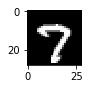

In [101]:
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Image_number = 52
plt.figure(figsize = (1,1))
plt.imshow(x_train[Image_number], cmap = 'gray')
print("Image_label:", y_train[Image_number])

In [102]:
train_samples = 5000
model = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)

In [103]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (60000, 784)
Training labels shape:  (60000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [105]:
start = time.time()
model.fit(x_train[:10000],y_train[:10000])
end = time.time()
print (end - start)

50.536503314971924


In [107]:
score = model.score(x_test,y_test)
print(score)

0.9071


(1, 784)
Image_label: 6
Predicted Label:  [6]


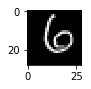

In [109]:
Test_image_number = 100
print(x_test[Test_image_number].reshape(1,28*28).shape)
print("Image_label:", y_test[Test_image_number])
print("Predicted Label: ", model.predict(x_test[Test_image_number].reshape(1,28*28)))
plt.figure(figsize = (1,1))
plt.imshow(x_test.reshape(10000,28,28)[Test_image_number], cmap = 'gray')